## More Machine Learning Models

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn.feature_extraction.text import TfidfVectorizer

# Import machine learing algorithms
from sklearn import model_selection, naive_bayes, svm, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import accuracy checker
from sklearn.metrics import accuracy_score

# Import pickle to save models
import pickle

In [2]:
with open('train_df_cleaned.pickle', 'rb') as train:
    train_df = pickle.load(train)

In [4]:
# Split the train and test data
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(
    train_df['title_final'], train_df['Category'],test_size=0.3)

In [5]:
train_df.head()

,itemid,title,Category,image_path,title_final
0,307504,"[nyx, sex, bomb, pallete, natural, palette]",0,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg,"['nyx', 'sex', 'bomb', 'pallete', 'natural', '..."
1,461203,"[etude, house, precious, mineral, any, cushion...",1,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg,"['etude', 'house', 'precious', 'mineral', 'cus..."
2,3592295,"[milani, rose, powder, blush]",2,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg,"['milani', 'rise', 'powder', 'blush']"
3,4460167,"[etude, house, baby, sweet, sugar, powder]",3,beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg,"['etude', 'house', 'baby', 'sweet', 'sugar', '..."
4,5853995,"[bedak, revlon, color, stay, aqua, mineral, ma...",3,beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg,"['bedak', 'revlon', 'color', 'stay', 'aqua', '..."


In [11]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train_df['title_final'])
train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)

In [7]:
print(Tfidf_vect.vocabulary_)

{'nyx': 3119, 'bomb': 567, 'pallete': 3245, 'natural': 3033, 'palette': 3241, 'etude': 1367, 'house': 1959, 'precious': 3534, 'mineral': 2869, 'cushion': 1063, 'pearl': 3299, 'aura': 216, 'puff': 3593, 'milani': 2856, 'rise': 3773, 'powder': 3518, 'blush': 538, 'baby': 242, 'sweet': 4364, 'sugar': 4313, 'bedak': 361, 'revlon': 3755, 'color': 918, 'stay': 4255, 'aqua': 164, 'make': 2663, 'dr': 1227, 'pure': 3605, 'whiten': 4871, 'cream': 1026, 'chanel': 805, 'snail': 4161, 'white': 4869, 'original': 3183, 'sunprise': 4333, 'proof': 3579, 'spf': 4215, 'eyebrow': 1413, 'satuan': 3885, 'rp': 3814, 'pc': 3292, 'monistat': 2940, 'chafe': 800, 'relief': 3715, 'gel': 1662, 'tea': 4429, 'balm': 270, 'meet': 2758, 'matte': 2725, 'laneige': 2419, 'water': 4844, 'base': 306, 'cc': 769, 'pa': 3213, 'giordani': 1697, 'gold': 1743, 'age': 54, 'defy': 1116, 'compact': 947, 'foundation': 1569, 'dengan': 1128, 'perfect': 3361, 'cover': 1009, 'body': 551, 'shop': 4049, 'refill': 3698, 'moisture': 2930, '

### kNN

In [17]:
# fit the training dataset on the classifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_KNN = KNN.predict(test_X_Tfidf)

# use accuracy_score function to get accuracy
print("KNN Accuracy Score -> ", accuracy_score(predictions_KNN, test_Y)*100)

KNN Accuracy Score ->  6.92251918893917


In [18]:
# fit the training dataset on the classifier
KNN2 = KNeighborsClassifier(n_neighbors = 45)
KNN2.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_KNN2 = KNN2.predict(test_X_Tfidf)

# use accuracy_score function to get accuracy
print("KNN V2 Accuracy Score -> ", accuracy_score(predictions_KNN2, test_Y)*100)

KNN V2 Accuracy Score ->  10.033752531439857


In [19]:
# fit the training dataset on the classifier
KNN3 = KNeighborsClassifier(n_neighbors = 7)
KNN3.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_KNN3 = KNN3.predict(test_X_Tfidf)

# use accuracy_score function to get accuracy
print("KNN V3 Accuracy Score -> ", accuracy_score(predictions_KNN3, test_Y)*100)

KNN V3 Accuracy Score ->  7.52006400480036


In [20]:
# fit the training dataset on the classifier
KNN4 = KNeighborsClassifier(n_neighbors = 350)
KNN4.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_KNN4 = KNN4.predict(test_X_Tfidf)

# use accuracy_score function to get accuracy
print("KNN V4 Accuracy Score -> ", accuracy_score(predictions_KNN4, test_Y)*100)

KNN V4 Accuracy Score ->  12.06690501787634


### Logistic Regression

https://stackoverflow.com/questions/38077190/how-to-increase-the-model-accuracy-of-logistic-regression-in-scikit-python

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [8]:
LogRegression = LogisticRegression()
LogRegression.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_LogRegression = LogRegression.predict(test_X_Tfidf)

# use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ", accuracy_score(y_true=test_Y, y_pred=predictions_LogRegression)*100)

# final result
# Logistic Regression Accuracy Score ->  70.76630747306048

/Users/laiyanjean/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laiyanjean/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy Score ->  70.76630747306048


In [7]:
# optimizing the Logistic Regression Model

# account for class imbalances (if any)
LogRegression2 = LogisticRegression(class_weight = 'balanced')
LogRegression2.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_LogRegression2 = LogRegression2.predict(test_X_Tfidf)

# use accuracy_score function to get the accuracy
print("Logistic Regression V2 Accuracy Score -> ", accuracy_score(y_true=test_Y, y_pred=predictions_LogRegression2)*100)

# final result
# Logistic Regression V2 Accuracy Score ->  68.47013526014452

/Users/laiyanjean/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laiyanjean/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression V2 Accuracy Score ->  68.47013526014452


In [8]:
# optimizing the Logistic Regression Model

# changing the solver from the default of 'liblinear' which does not handle multinomial loss
# note that 'lbfgs' generates a convergence warning
LogRegression3 = LogisticRegression(solver = 'newton-cg')
LogRegression3.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_LogRegression3 = LogRegression3.predict(test_X_Tfidf)

# use accuracy_score function to get the accuracy
print("Logistic Regression V3 Accuracy Score -> ", accuracy_score(y_true=test_Y, y_pred=predictions_LogRegression3)*100)

# final result
# Logistic Regression V3 Accuracy Score ->  71.07633072480436

Logistic Regression V3 Accuracy Score ->  71.07633072480436


In [10]:
# optimizing the Logistic Regression Model

# adding multi_class = 'auto'
LogRegression4 = LogisticRegression(solver = 'newton-cg', multi_class = 'auto')
LogRegression4.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_LogRegression4 = LogRegression4.predict(test_X_Tfidf)

# use accuracy_score function to get the accuracy
print("Logistic Regression V4 Accuracy Score -> ", accuracy_score(y_true=test_Y, y_pred=predictions_LogRegression4)*100)

# final result
# Logistic Regression V4 Accuracy Score ->  71.17683826286971

Logistic Regression V4 Accuracy Score ->  71.17683826286971


In [ ]:
# optimizing the Logistic Regression Model

# changing the solver from the default of 'liblinear' 
LogRegression5 = LogisticRegression(solver = 'saga', multi_class = 'auto')
LogRegression5.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_LogRegression5 = LogRegression5.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Logistic Regression V5 Accuracy Score -> ", accuracy_score(y_true=test_Y, y_pred=predictions_LogRegression5)*100)

# final result
# Logistic Regression V5 Accuracy Score ->  71.1803385253894

In [16]:
import pickle
filename_LogReg = 'LogReg_SagaSolver.sav'
pickle.dump(LogRegression5, open(filename_LogReg, 'wb'))

In [12]:
# optimizing the Logistic Regression Model

# changing the solver from the default of 'liblinear' 
LogRegression6 = LogisticRegression(solver = 'sag', multi_class = 'auto')
LogRegression6.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_LogRegression6 = LogRegression6.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Logistic Regression V6 Accuracy Score -> ", accuracy_score(y_true=test_Y, y_pred=predictions_LogRegression6)*100)

# final result
# Logistic Regression V6 Accuracy Score -> 71.17733830037253

Logistic Regression V6 Accuracy Score ->  71.17733830037253


In [12]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_Y, predictions_LogRegression)
cnf_matrix

array([[ 440,   22,   69, ...,    0,    0,    0],
       [  29, 5080,   50, ...,    0,    0,    0],
       [  36,   26, 2848, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,   29,    0,    0],
       [   0,    0,    0, ...,    0,   25,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

### SVM

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, test_Y)*100)

In [ ]:
# fit the training dataset on the classifier
SVM2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM2.fit(train_X_Tfidf, train_Y)

# predict the labels on validation dataset
predictions_SVM2 = SVM2.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM V2 Accuracy Score -> ", accuracy_score(predictions_SVM, test_Y)*100)

### Loading and Using the Models

In [9]:
# Open cleaned test dataframe
with open('test_df_cleaned.pkl', 'rb') as test:
    test_df = pickle.load(test)

In [12]:
test_Tfidf = Tfidf_vect.transform(test_df['title_final'])

In [13]:
with open('LogReg_SagaSolver.sav', 'rb') as f:
    LogReg_model = pickle.load(f)

In [14]:
# predict categories using the SVM model
predictions_LogReg = LogReg_model.predict(test_Tfidf)

In [15]:
type(predictions_LogReg)

numpy.ndarray

In [16]:
predictions_LogReg

array([ 5,  5,  5, ..., 35, 33, 34])

In [17]:
len(predictions_LogReg)

172402

In [18]:
test_df['Category'] = predictions_LogReg

In [19]:
import matplotlib.pyplot as plt

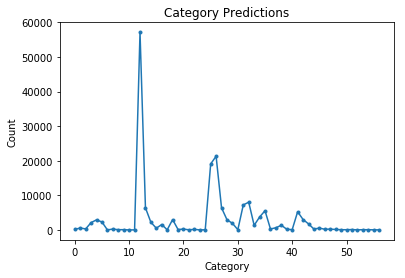

In [20]:
# View the predictions
fig, axl = plt.subplots()
axl.set_title("Category Predictions")
axl.set_ylabel("Count")
axl.set_xlabel("Category")
test_df.Category.value_counts().sort_index().plot(ax = axl, marker = '.')
test_df['Category'] = predictions_LogReg

In [22]:
test_df2 = test_df.loc[:, ['itemid', 'Category']]

In [24]:
test_df2.to_csv("submission.csv", index=False)